(569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  

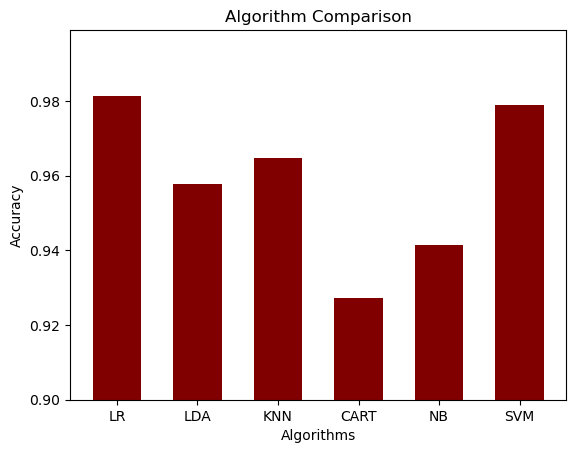

Confusion Matrix:
 [[88  2]
 [ 3 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143


Predictions for each test instance:
         Actual  Predicted
0    Malignant  Malignant
1       Benign     Benign
2       Benign     Benign
3       Benign     Benign
4       Benign     Benign
..         ...        ...
138  Malignant  Malignant
139     Benign     Benign
140     Benign     Benign
141     Benign     Benign
142  Malignant  Malignant

[143 rows x 2 columns]


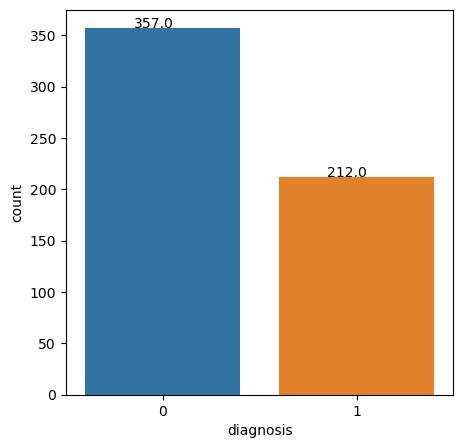


*** Conclusion ***
Based on the machine learning models prediction, the breast cancer dataset is classified as:
Benign.


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split

# Load Dataset
dataset = pd.read_csv('BreastCancer.csv')

# Summarize Dataset
print(dataset.shape)
print(dataset.head(5))

# Mapping Class String Values to Numbers
dataset['diagnosis'] = dataset['diagnosis'].map({'B': 0, 'M': 1}).astype(int)

# Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)
X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values

# Splitting Dataset into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Define Models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Model Evaluation
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f' % (name, cv_results.mean()))

# Bar Plot for Algorithm Comparison
plt.ylim(.900, .999)
plt.bar(names, res, color='maroon', width=0.6)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Algorithm Comparison')
plt.show()

# Training & Prediction using the algorithm with high accuracy (e.g., SVM)
svm_model = SVC(gamma='auto')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Evaluate Model
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

predictions = np.where(y_pred == 1, 'Malignant', 'Benign')
actual_labels = np.where(y_test == 1, 'Malignant', 'Benign')

results_df = pd.DataFrame({'Actual': actual_labels, 'Predicted': predictions})
print("\nPredictions for each test instance:\n", results_df)


# Count Plot
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=dataset['diagnosis'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))
plt.savefig('count_plot.jpg')
plt.show()


print("\n*** Conclusion ***")
print("Based on the machine learning models prediction, the breast cancer dataset is classified as:")
if results_df['Predicted'].value_counts().idxmax() == 'Malignant':
    print("Malignant.")
else:
    print("Benign.")